## **BlinkitAnalysisPy**

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Imran/Blinkit Analysis/BlinkIT Grocery Data.csv")

In [3]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [5]:
print("Size of Data:",df.shape)

Size of Data: (8523, 12)


In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

### Data Cleaning

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Business Objectives

### KPI Recipe

In [11]:
df.rename(columns={'Total Sales': 'Sales'}, inplace=True)

In [12]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
no_of_items_sold = df['Sales'].count()
avg_ratings = df['Rating'].mean()

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.0f}")

Total Sales: $1,201,681
Average Sales: $141
No of Items Sold: 8,523
Average Ratings: 4


### KPI Visualization Plan

### Total Sales by Fat Content

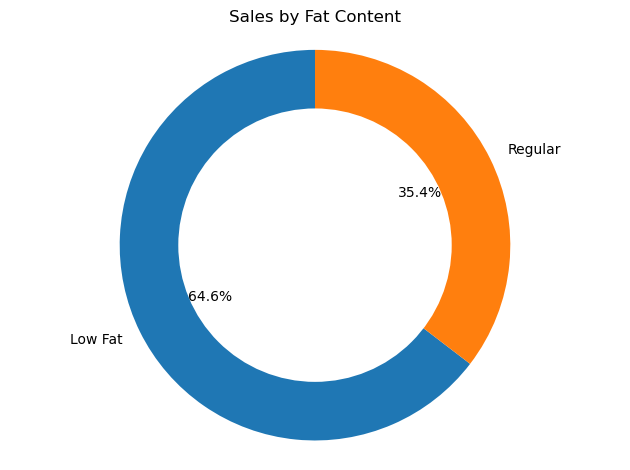

In [13]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f%%', startangle = 90)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.tight_layout()

plt.show()

### Total Sales by Item Type

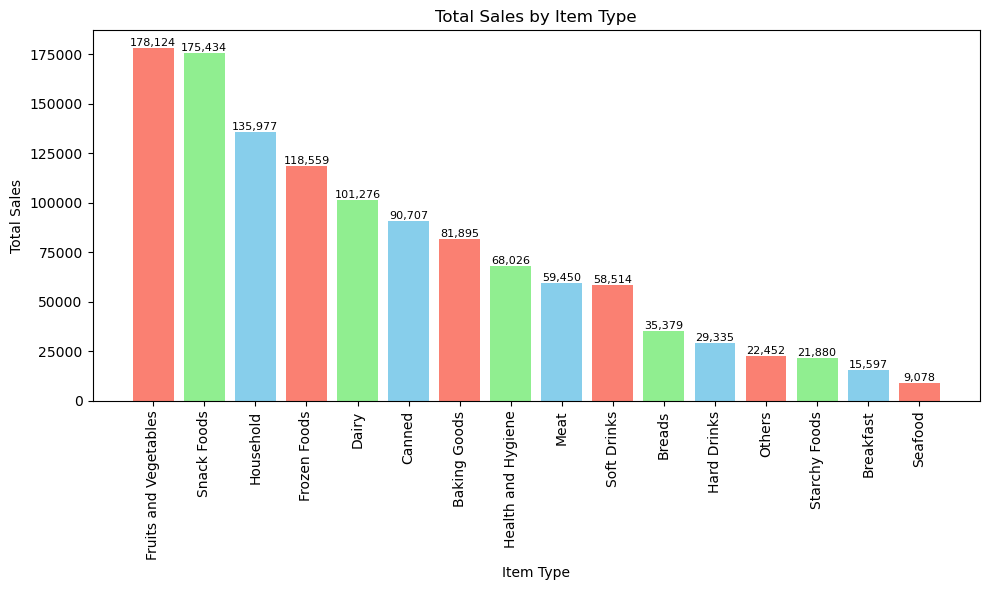

In [14]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['salmon', 'lightgreen', 'skyblue']
bars = plt.bar(sales_by_type.index, sales_by_type.values, color=colors)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
        f'{bar.get_height():,.0f}',  ha='center', va='bottom',fontsize=8)       

plt.tight_layout()
plt.show()

### Fat Content by Outlet for Total Sales

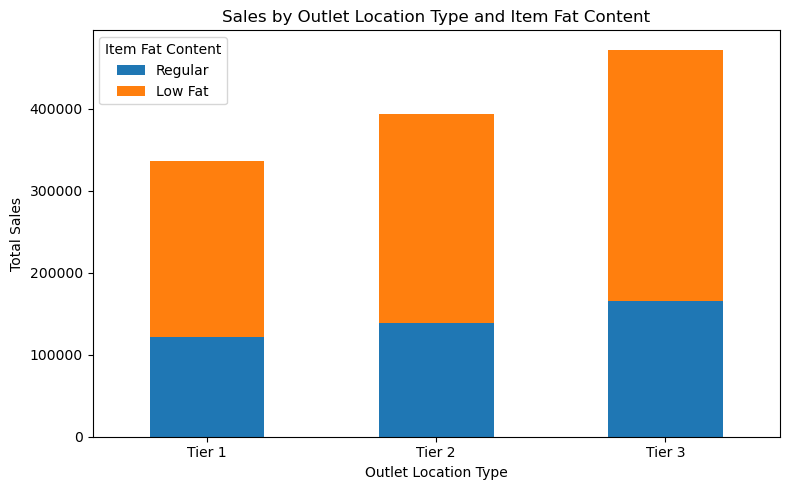

In [15]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 5),
                  title='Sales by Outlet Location Type and Item Fat Content')

plt.xlabel('Outlet Location Type') 
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.xticks(rotation=0) 

plt.tight_layout()
plt.show()

### Total Sales by Outlet Establishment

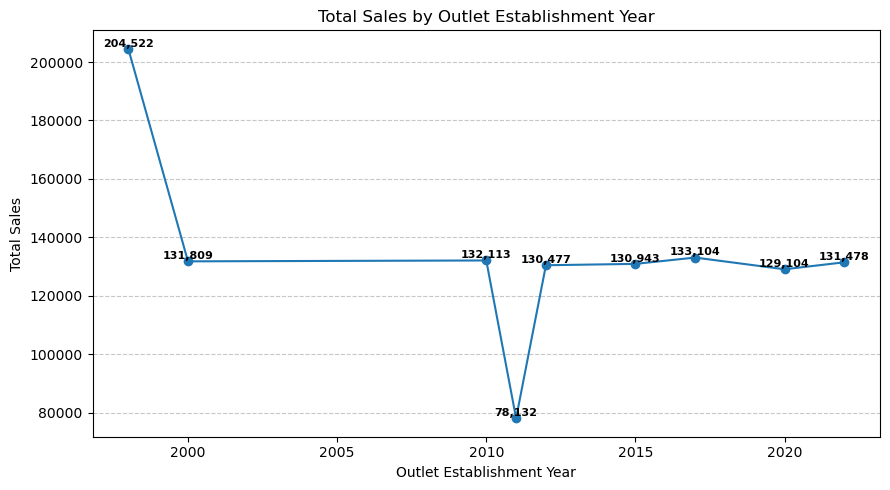

In [16]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle="-")

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year') 

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y + 50, f'{y:,.0f}', ha='center', va='bottom', fontsize=8, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

### Sales by Outlet Size

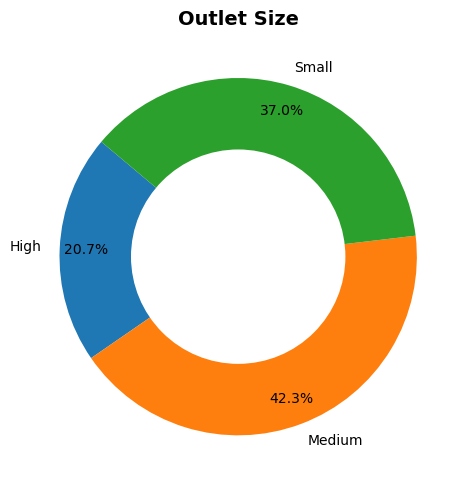

In [20]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(5, 5)) 
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=140,
        pctdistance=0.85) 

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

plt.title('Outlet Size', fontsize=14, weight='bold')
plt.ylabel('') 

plt.tight_layout()
plt.show()

### Sales by Outlet Location

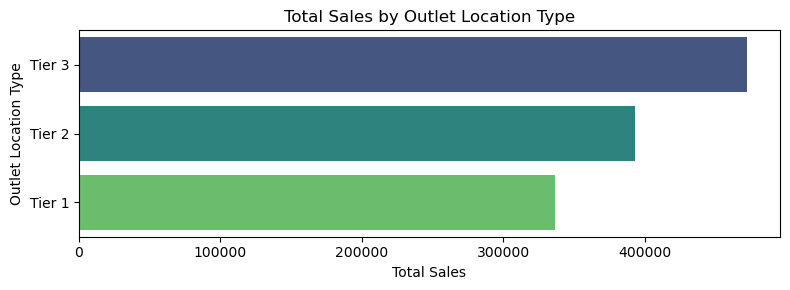

In [24]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))

ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='viridis',
                hue='Outlet Location Type',legend=False )

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout() 
plt.show()